In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from gcs.geometry import gcs_mesh
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

import sunpy
import sunpy.map
import astropy
from astropy.visualization import ImageNormalize, SqrtStretch
from astropy.io import fits
from astropy.wcs import WCS, wcs
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import astropy_mpl_style
from astropy.visualization import ImageNormalize
from astropy.time import Time

 
from sunpy.coordinates import frames, get_horizons_coord
from reproject.mosaicking import reproject_and_coadd
from reproject import reproject_interp

from astropy.visualization import  ImageNormalize, LogStretch, PowerStretch
#import sunpy_soar
from sunpy.net import helioviewer
import glob
from sunpy.map.maputils import all_coordinates_from_map
from sunpy.coordinates import get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time
%matplotlib widget

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, -200.0, '−200'),
  Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200')])

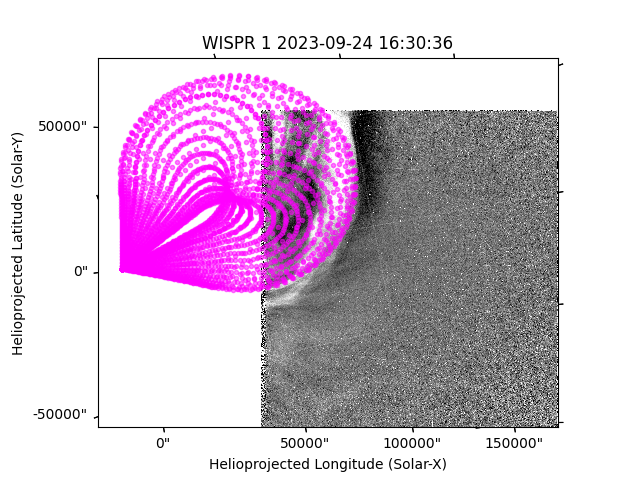

In [5]:
#Set GCS parameters
date = "2023/09/24T16:30:00"
half_angle = np.radians(36)  
height = 19.5
kappa = 0.36
lat = np.radians(30) 
lon = np.radians(100) #-360
tilt = np.radians(50.64)
#Create the GCS mesh to overlay
mesh = gcs_mesh_sunpy(date, half_angle, height, 30, 30, 30, kappa, lat, lon, tilt)

#f0: WISPR inner tile
f0= './psp_LW_wispr_20230924T163028_V1_1221.fits'
#f1: SoloHI tile 2
f1 = './solo_LW_solohi-2ft_20230924T162734_V00.fits'

map0 =sunpy.map.Map(f0)
map1 = sunpy.map.Map(f1)

mesh = gcs_mesh_sunpy(date, half_angle, height, 30, 30, 30, kappa, lat, lon, tilt)

#Example of WISPR-Inner
fig = plt.figure()
ax = plt.subplot(projection=map0)
map0.plot(cmap=plt.cm.Greys_r, clip_interval=(1, 98)*u.percent) 
#norm=ImageNormalize(vmin=-2.01455E-12, vmax= 2.83564E-12)) #vmin=0.99, vmax=1.03))
ax.plot_coord(mesh, '.', color = 'magenta', ms=6, alpha = 0.5)
plt.xlabel( 'Helioprojected Longitude (Solar-X)', fontsize=10)
plt.ylabel( 'Helioprojected Latitude (Solar-Y)',fontsize=10)
plt.xticks(fontsize = 50) 
plt.yticks(fontsize = 50) 

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Observatory,STEREO A
Instrument,SECCHI
Detector,COR2
Measurement,white-light
Wavelength,0.0
Observation Date,2023-09-24 16:30:15
Exposure Time,17.9999 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[14.7 14.7] arcsec / pix
Reference Pixel,[1015.49 1022.64] pix

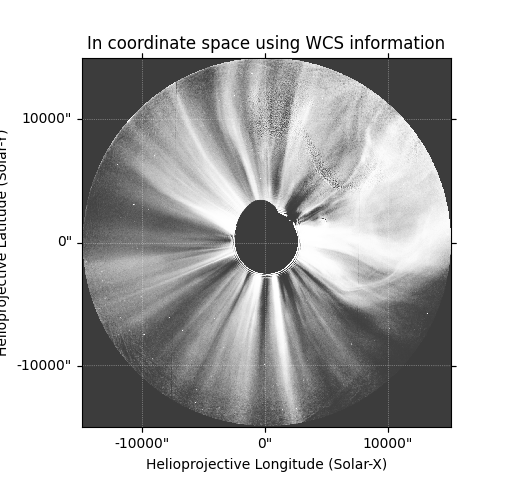
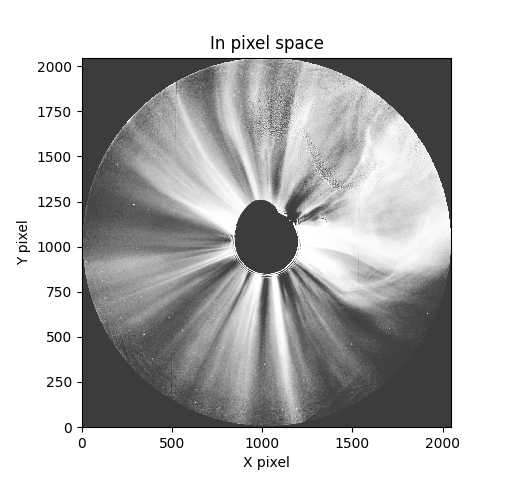
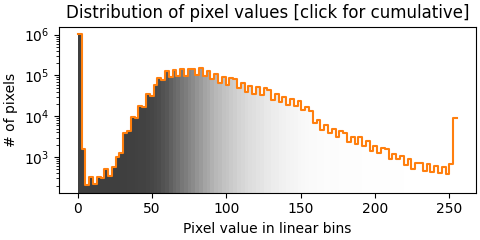
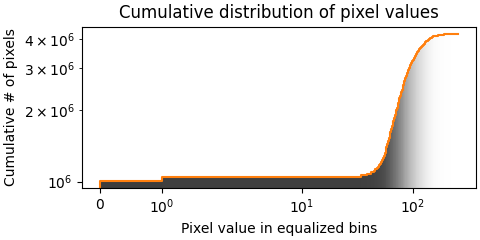

In [6]:
import hvpy
from hvpy.datasource import DataSource
from datetime import datetime
#Download processed COR2 image
file_cor2 = hvpy.save_file(hvpy.getJP2Image(parse_time('2023/09/24 16:30').datetime,hvpy.DataSource.COR2_A.value), "image1", overwrite=True)
file_cor2
map3 = sunpy.map.Map(file_cor2)
map3

In [ ]:
# Download processed C3 images
file_c3 = hvpy.save_file(hvpy.getJP2Image(parse_time('2023/09/24 16:30').datetime,hvpy.DataSource.LASCO_C3.value), "image2", overwrite=True)
map4 = sunpy.map.Map(file_c3)
map4